# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load The Data](#3.3_Load_The_Data)
  * [3.4 Explore The Data](#3.4_Explore_The_Data)
  * [3.5 Data Statistics & Distribution](#3.5_Data_Statistics_and_Distribution)
      * [3.5.1 Data Statistics](#3.5.1_Data_Statistics)
      * [3.5.2 Distribution](#3.5.2_Distribution)
  * [3.6 Visualization](#3.6_Visualization)
      * [3.6.1 Top 10 Popular Playlists](#3.6.1_Top_10_Popular_Playlists)
      * [3.6.2 Top 10 Popular Tracks](#3.6.2_Top_10_Popular_Tracks)
      * [3.6.3 Top 10 Popular Albums](#3.6.3_Top_10_Popular_Albums)


## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob, collections


## 3.3 Load The Data (20,000 playlists) <a id='3.3_Load_The_Data'></a>

In [2]:
read_files = glob.glob("spotify_million_playlist_dataset/data/*.json")
df = pd.DataFrame()

for f in read_files:
    with open(f, "rb") as infile:
        data = json.load(infile)
        each_json_file = pd.DataFrame(data['playlists'])
        df = df.append(each_json_file)

In [3]:
print("Number of playlists: " , len(df))

Number of playlists:  20000


In [4]:
df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,NewNew,false,7000,1509321600,83,78,2,"[{'pos': 0, 'artist_name': 'WILDES', 'track_ur...",49,18461552,72,NaN
1,chilllll,false,7001,1506902400,18,15,1,"[{'pos': 0, 'artist_name': 'Angus & Julia Ston...",8,4031475,10,NaN
2,offline,false,7002,1505433600,63,48,1,"[{'pos': 0, 'artist_name': 'Keith Urban', 'tra...",16,15021695,45,NaN
3,feels,false,7003,1508284800,97,51,1,"[{'pos': 0, 'artist_name': 'Chance The Rapper'...",20,24751320,27,NaN
4,Latin Dance,false,7004,1489795200,23,20,1,"[{'pos': 0, 'artist_name': 'Merengue Latin Ban...",3,5989994,11,NaN


## 3.4 Explore The Data<a id='3.4_Explore_The_Data'></a>

### Create tracks list

In [5]:
track_dict = {}
album_dict = {}

for i in range(len(df)):
    row = df.iloc[i]
    playlist_id = row['pid']
    
    for track in row['tracks']:
        song_id = track['track_uri']
        song_name = track['track_name']
        
        album_id = track['album_uri']
        album_name = track['album_name']
        
        
        if song_id not in track_dict:
            track_dict[song_id] = {'name': song_name, 'playlist_vector': [], 'freq': 0}
            
            
        if album_id not in album_dict:
            album_dict[album_id] = {'name': album_name, 'freq': 0}

        track_dict[song_id]['freq'] += 1
        album_dict[album_id]['freq'] += 1
        track_dict[song_id]['playlist_vector'].append(playlist_id)

### Save unique tracks and unique albums as pandas DF


In [6]:
df_unique_tracks = pd.DataFrame.from_dict(track_dict, orient="index").reset_index()
df_unique_tracks.columns = ['track_id', 'track_name', 'playlist_vector', 'frequency']

df_unique_albums = pd.DataFrame.from_dict(album_dict, orient="index").reset_index()
df_unique_albums.columns = ['album_id', 'album_name', 'frequency']

In [7]:
print(len(df_unique_tracks))
df_unique_tracks.head(10)

263214


,track_id,track_name,playlist_vector,frequency
0,spotify:track:3uvsVUrAaGQJCTEUR1S3Sx,Bare,"[7000, 6519, 19095, 11643]",4
1,spotify:track:0heE5tAAaDQmnGhVDImPl2,Dynasty,"[7000, 6257, 8212, 16246, 10028, 673, 859, 550...",10
2,spotify:track:3omXshBamrREltcf24gYDC,First,"[7000, 7017, 7156, 7268, 7278, 7303, 7487, 753...",203
3,spotify:track:6TYWE19e35N7Bn5heHwyY6,Your Girl,"[7000, 7095, 3325, 2414, 16125, 16161, 9815, 1...",12
4,spotify:track:1xznGGDReH1oQq0xzbwXa3,One Dance,"[7000, 7038, 7054, 7054, 7061, 7071, 7080, 708...",837
5,spotify:track:0yy6a8NCTaaVQwyEPIi8UU,Like It Doesn't Hurt (feat. Husser),"[7000, 3307, 769, 11249, 20063, 12395]",6
6,spotify:track:4vb4mFvYsr2h6enhjJsq9Y,Water Under the Bridge,"[7000, 7493, 7630, 7706, 3061, 3179, 3834, 627...",89
7,spotify:track:4DMg5fvBfDLannugAGN2QG,Sweet Jane,"[7000, 7706, 7868, 6000, 11504]",5
8,spotify:track:1Jx5IdnXAJCKZ8EuczL5gX,Black Water,"[7000, 7699, 7906, 8130, 16132, 9729, 9886]",7
9,spotify:track:6NYtqWYqMbnzoEU9jXla80,Taking You There,"[7000, 3280, 6443, 16138, 16637, 438, 20218, 1...",8


In [8]:
print(len(df_unique_albums))
df_unique_albums.head(10)

120570


,album_id,album_name,frequency
0,spotify:album:2kIoMj5Ht14l2PnNRa2abC,Bare,4
1,spotify:album:3g7TTE6375PGIBsM9Tlk9I,Dynasty,10
2,spotify:album:2H09itV5a5yUcGyk9u9HwY,Hold My Home,203
3,spotify:album:38y7zXf95O9Afh7ZXIoyq1,Your Girl,12
4,spotify:album:3hARKC8cinq3mZLLAEaBh9,Views,2174
5,spotify:album:03Mt9e0CBDHql28QNn4gbT,Main Girl,12
6,spotify:album:0K4pIOOsfJ9lK8OjrZfXzd,25,885
7,spotify:album:0Bc6vNUNCliO2yIDtpGNL6,That Low and Lonesome Sound,5
8,spotify:album:4PAyBqzCYoIIjjPFszeqgT,Beneath The Skin,64
9,spotify:album:17vQyc1dhEyxV6q5AxOWh8,Broods,64


### 3.5 Data Statistics & Distribution <a id='3.5_Data_Statistics_and_Distribution'></a>

### 3.5.1 Data Statistics <a id='3.5.1_Data_Statistics'></a>

In [9]:
df.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,10799.500000,1.476559e+09,66.598100,49.749900,2.788700,17.851300,1.562522e+07,38.211200
std,6057.653672,3.653277e+07,53.771169,40.031271,116.383069,20.871964,1.286244e+07,30.413355
min,0.000000,1.310602e+09,5.000000,2.000000,1.000000,2.000000,5.710860e+05,3.000000
25%,5999.750000,1.459123e+09,26.000000,20.000000,1.000000,5.000000,6.064626e+06,16.000000
50%,10999.500000,1.490573e+09,50.000000,37.000000,1.000000,10.000000,1.151855e+07,30.000000
75%,15999.250000,1.505606e+09,92.000000,68.000000,1.000000,22.000000,2.143368e+07,52.000000
max,20999.000000,1.509494e+09,250.000000,233.000000,15842.000000,178.000000,9.818810e+07,199.000000


In [10]:
ms_to_min = 1.66667e-5
ms_to_hour = 2.77778e-7
med_duration_ms = int(df['duration_ms'].median())

print(df.describe())

print()
print(f"Total number of playlists: {df['pid'].count()}")
print(f"Total number of tracks: {df['num_tracks'].sum()}")
print(f"Total number of `unique` tracks: {len(track_dict)}")
print(f"Total number of albums: {df['num_albums'].sum()}")
print(f"Total number of `unique` albums: {len(album_dict)}")

print()
print('The Median value in each playlist:')
print(f"Median of number of tracks in each playlist: {int(df['num_tracks'].median())}")
print(f"Median of number of albums in each playlist: {int(df['num_albums'].median())}")
print(f"Median of number of followers in each playlist: {int(df['num_followers'].median())}")
print(f"Median of number of edits in each playlist: {int(df['num_followers'].median())}")
print(f"Median of number of durations in each playlist: {med_duration_ms} (ms) ~ {int(med_duration_ms * ms_to_min)} minutes ~ {int(med_duration_ms * ms_to_hour)} hours")
print(f"Median of number of num_artists in each playlist: {int(df['num_artists'].median())}")

                pid   modified_at    num_tracks    num_albums  num_followers  \
count  20000.000000  2.000000e+04  20000.000000  20000.000000   20000.000000   
mean   10799.500000  1.476559e+09     66.598100     49.749900       2.788700   
std     6057.653672  3.653277e+07     53.771169     40.031271     116.383069   
min        0.000000  1.310602e+09      5.000000      2.000000       1.000000   
25%     5999.750000  1.459123e+09     26.000000     20.000000       1.000000   
50%    10999.500000  1.490573e+09     50.000000     37.000000       1.000000   
75%    15999.250000  1.505606e+09     92.000000     68.000000       1.000000   
max    20999.000000  1.509494e+09    250.000000    233.000000   15842.000000   

          num_edits   duration_ms   num_artists  
count  20000.000000  2.000000e+04  20000.000000  
mean      17.851300  1.562522e+07     38.211200  
std       20.871964  1.286244e+07     30.413355  
min        2.000000  5.710860e+05      3.000000  
25%        5.000000  6.064626

### Cleaning...
Inspection: 
- num_followers: evidence of outlier
- description: mostly NaN 

In [11]:
#df[df['num_followers'] < 15842].count()
#df[df['num_followers'] > 50].count()
#df[df['num_followers'] < 2].count()
df[df['num_followers'] > 2].count()

name             1957
collaborative    1957
pid              1957
modified_at      1957
num_tracks       1957
num_albums       1957
num_followers    1957
tracks           1957
num_edits        1957
duration_ms      1957
num_artists      1957
description        81
dtype: int64

### 3.5.2 Distribution <a id='3.5.2_Distribution'></a>

<Figure size 576x1080 with 0 Axes>

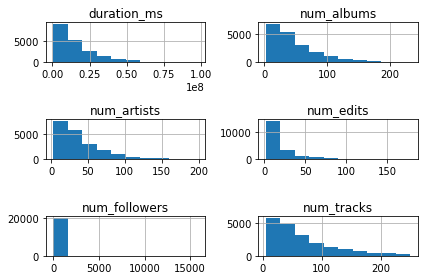

In [12]:
plt.figure(figsize=(8, 15))
df.hist(column=['duration_ms','num_albums','num_artists','num_edits','num_followers','num_tracks'])
plt.tight_layout()
plt.show()

## 3.6 Visualization <a id='3.6_Visualization'></a>

### 3.6.1 Top 10 Popular Playlists <a id='3.6.1_Top_10_Popular_Playlists'></a>

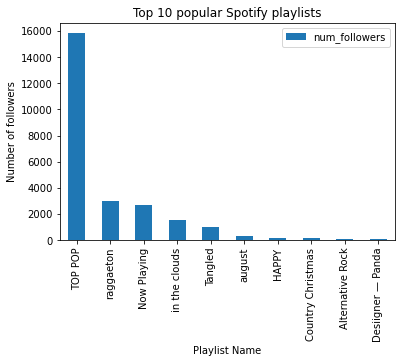

In [13]:
# The playlists that have more followers are considered as more popular
top_10_playlist = df.sort_values(by=['num_followers'], ascending = False).head(10)


top_10_playlist.plot(kind='bar', x='name', y='num_followers')
plt.title('Top 10 popular Spotify playlists')
plt.xlabel('Playlist Name')
plt.ylabel('Number of followers')

plt.show()


### 3.6.2 Top 10 Popular Tracks <a id='3.6.2_Top_10_Popular_Tracks'></a>

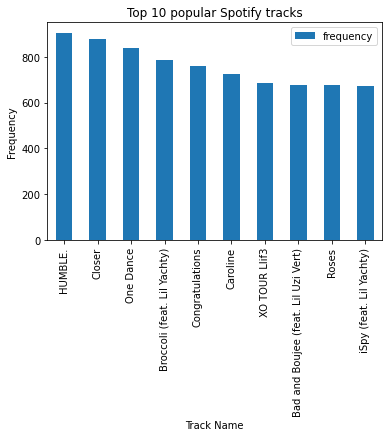

In [14]:
top_10_tracks = df_unique_tracks.sort_values(by=['frequency'], ascending = False).head(10)


top_10_tracks.plot(kind='bar', x='track_name', y='frequency')
plt.title('Top 10 popular Spotify tracks')
plt.xlabel('Track Name')
plt.ylabel('Frequency')

plt.show()

### 3.6.3 Top 10 Popular Albums <a id='3.6.3_Top_10_Popular_Albums'></a>


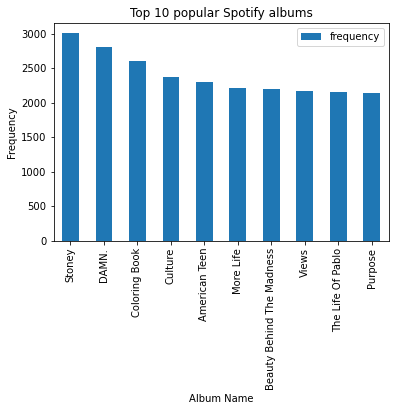

In [16]:
top_10_albums = df_unique_albums.sort_values(by=['frequency'], ascending = False).head(10)


top_10_albums.plot(kind='bar', x='album_name', y='frequency')
plt.title('Top 10 popular Spotify albums')
plt.xlabel('Album Name')
plt.ylabel('Frequency')

plt.show()